In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.6)

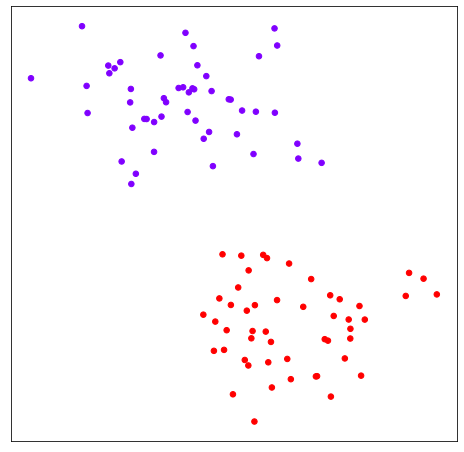

In [4]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap='rainbow')
plt.xticks([])
plt.yticks([])
ax = plt.gca()

In [5]:
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [6]:
axis_x = np.linspace(xlim[0],xlim[1],30)
axis_y = np.linspace(ylim[0],ylim[1],30)

In [7]:
axis_x, axis_y = np.meshgrid(axis_x, axis_y)

In [8]:
axis_x.shape

(30, 30)

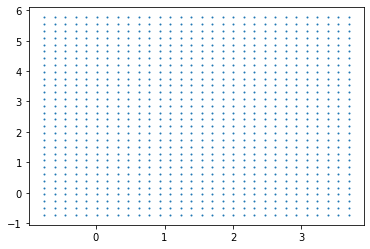

In [9]:
plt.scatter(axis_x, axis_y
           ,s=1)

In [10]:
svc = SVC(kernel='linear').fit(X,y)

In [11]:
xy = np.vstack([axis_x.ravel(), axis_y.ravel()]).T

In [12]:
xy.shape

(900, 2)

In [13]:
xy

array([[-0.75755772, -0.73190977],
       [-0.60429062, -0.73190977],
       [-0.45102351, -0.73190977],
       ...,
       [ 3.38065409,  5.7697841 ],
       [ 3.53392119,  5.7697841 ],
       [ 3.6871883 ,  5.7697841 ]])

In [6]:
def svc_plot(svc,ax=None):    #绘制决策边界图函数
    if ax == None:
        ax = plt.gca()
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    axis_x = np.linspace(xlim[0],xlim[1],30)
    axis_y = np.linspace(ylim[0],ylim[1],30)

    axis_x, axis_y = np.meshgrid(axis_x, axis_y)
    xy = np.vstack([axis_x.ravel(), axis_y.ravel()]).T
    
    Z = svc.decision_function(xy).reshape(axis_x.shape)

    ax.contour(axis_x, axis_y, Z
              ,colors='k'
              ,levels=[-1,0,1]
              ,alpha=0.5
              ,linestyles=['--','-','--']
              )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [15]:
svc.support_vectors_[0]

array([0.44359863, 3.11530945])

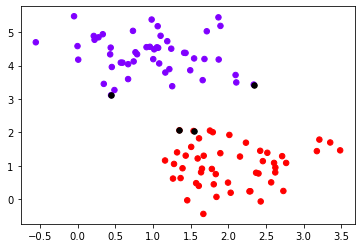

In [16]:
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap='rainbow')
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1],c='k',s=30)

In [17]:
svc.n_support_

array([2, 2])

In [18]:
from sklearn.datasets import make_circles

In [19]:
X, y = make_circles(n_samples=100
                   ,factor=0.2
                   ,noise=0.1
                   )

In [20]:
X.shape

(100, 2)

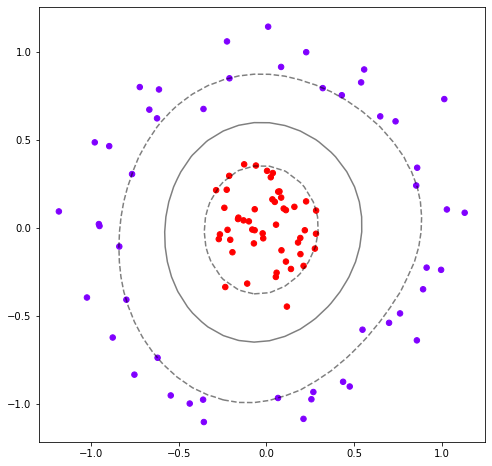

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1]
           ,c=y
           ,s=30
           ,cmap='rainbow'
           )
svc = SVC(kernel='rbf').fit(X, y)
svc_plot(svc)

In [22]:
r = np.exp(-(X**2).sum(1))

In [23]:
rlim = np.linspace(min(r),max(r),100)

In [24]:
rlim

array([0.20932005, 0.21729116, 0.22526226, 0.23323336, 0.24120446,
       0.24917557, 0.25714667, 0.26511777, 0.27308887, 0.28105998,
       0.28903108, 0.29700218, 0.30497329, 0.31294439, 0.32091549,
       0.32888659, 0.3368577 , 0.3448288 , 0.3527999 , 0.360771  ,
       0.36874211, 0.37671321, 0.38468431, 0.39265541, 0.40062652,
       0.40859762, 0.41656872, 0.42453982, 0.43251093, 0.44048203,
       0.44845313, 0.45642423, 0.46439534, 0.47236644, 0.48033754,
       0.48830865, 0.49627975, 0.50425085, 0.51222195, 0.52019306,
       0.52816416, 0.53613526, 0.54410636, 0.55207747, 0.56004857,
       0.56801967, 0.57599077, 0.58396188, 0.59193298, 0.59990408,
       0.60787518, 0.61584629, 0.62381739, 0.63178849, 0.6397596 ,
       0.6477307 , 0.6557018 , 0.6636729 , 0.67164401, 0.67961511,
       0.68758621, 0.69555731, 0.70352842, 0.71149952, 0.71947062,
       0.72744172, 0.73541283, 0.74338393, 0.75135503, 0.75932613,
       0.76729724, 0.77526834, 0.78323944, 0.79121055, 0.79918

In [25]:
from mpl_toolkits import mplot3d

In [26]:
def plot_3D(X,y,r,elev=30,azim=30):  #绘制3D图
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

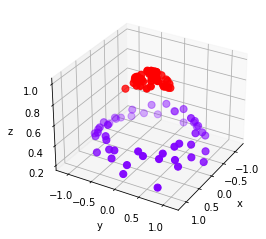

In [27]:
plot_3D(X,y,r)

In [11]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_moons, make_blobs, make_classification

In [12]:
n_samples = 100

datasets = [
    make_circles(n_samples=n_samples, noise=0.2, factor=0.2, random_state=0),
    make_moons(n_samples=n_samples, noise=0.2, random_state=420),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, random_state=10)
]

In [13]:
Kernel = ['linear','poly','rbf','sigmoid']

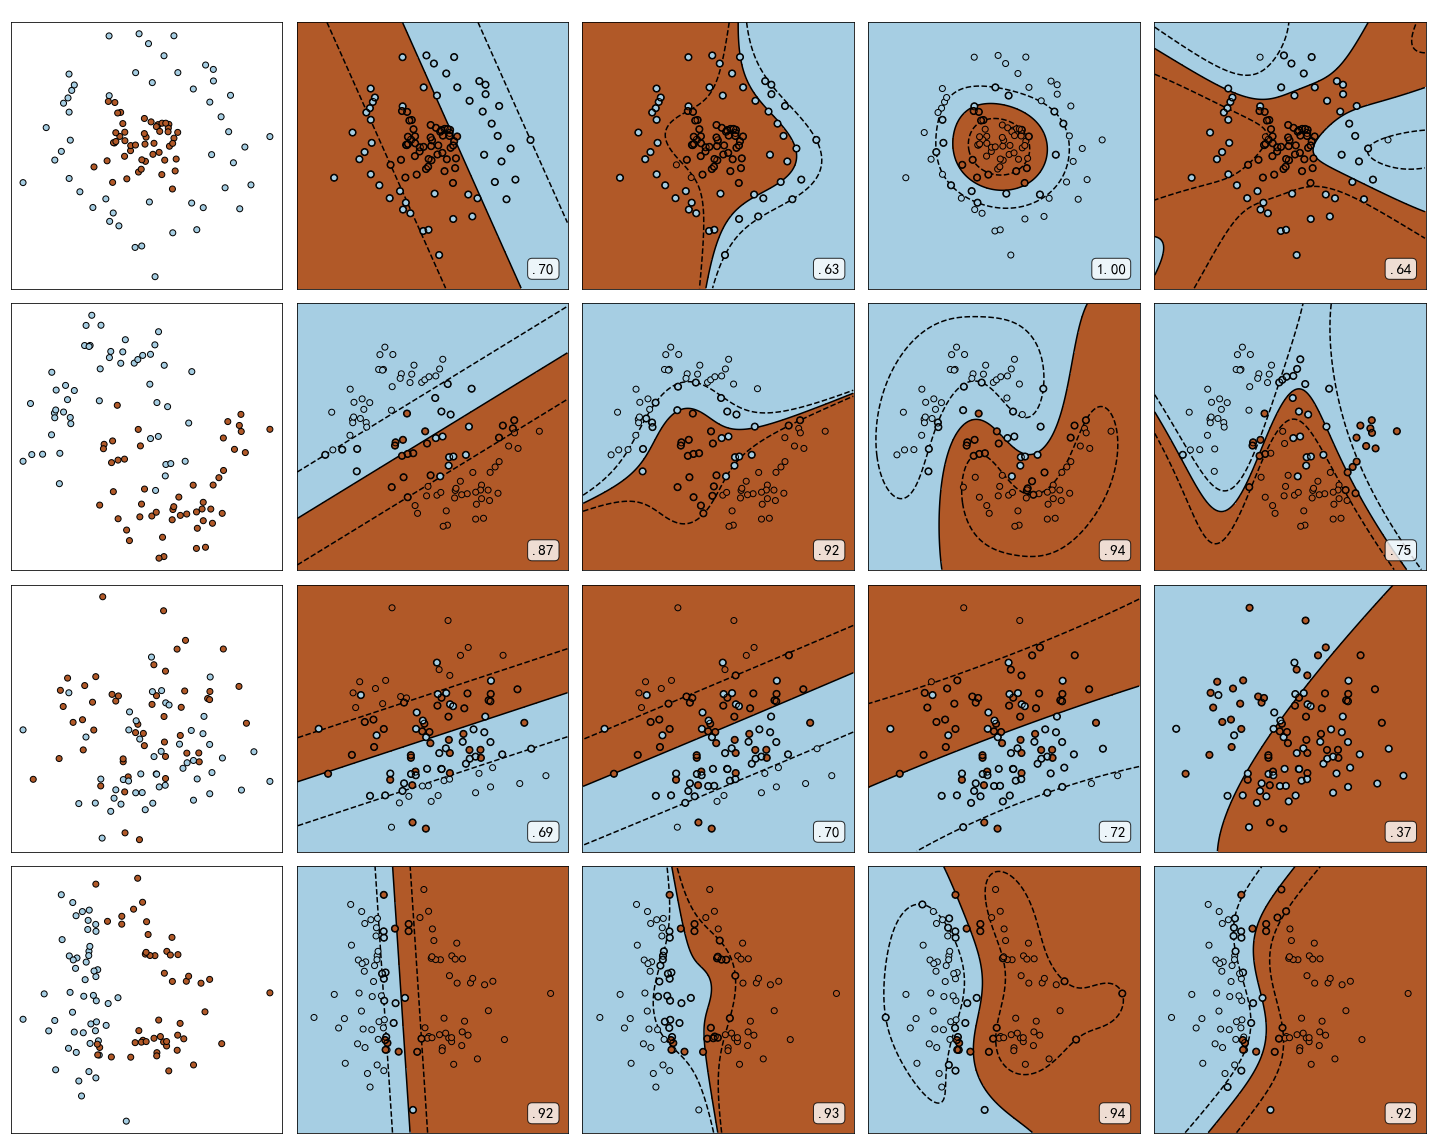

In [18]:
rows = len(datasets)
cols = len(Kernel) + 1

fig, axes = plt.subplots(rows, cols, figsize=(20,16))

for i, (X, y) in enumerate(datasets):
    axes[i,0].scatter(X[:,0],X[:,1],c=y
                      #,s=50
                      ,cmap=plt.cm.Paired
                      ,edgecolors='k'
                      ,zorder=10
                     )
    if i == 0:
        axes[i,0].set_title('默认', color='white')
    axes[i,0].set_xticks([])
    axes[i,0].set_yticks([])
    for j in range(len(Kernel)):
        ax = axes[i,j+1]
        
        svc = SVC(kernel=Kernel[j],C=1).fit(X,y)
        score = svc.score(X,y)
        
        ax.scatter(X[:,0],X[:,1],c=y
                   #,s=50
                   ,cmap=plt.cm.Paired
                   ,edgecolors='k'
                   ,zorder=10
                  ) #散点图
        ax.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1]
                   ,s=50
                   ,facecolor='none'  #透明的支持向量
                   ,edgecolors='k'
                   ,zorder=10
                  )
        
        #绘制决策边界
        x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
        y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
        
        XX, YY = np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
        
        Z = svc.decision_function(np.c_[XX.ravel(),YY.ravel()]).reshape(XX.shape)
        
        ax.pcolormesh(XX, YY, Z>0, shading='auto', cmap=plt.cm.Paired)  #等高线不同区域颜色
        ax.contour(XX, YY, Z, colors=['k','k','k']
                   ,linestyles=['--','-','--']
                   ,levels=[-1,0,1]
                  )
        ax.set_xticks([])
        ax.set_yticks([])
        
        # svc_plot(svc,ax=ax)
        if i == 0:
            ax.set_title(Kernel[j],color='white')
            
        ax.text(0.95,0.06,('%.2f' % score).lstrip('0')
               ,size=15
               ,bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')  #bbox为字典，意为方框
               ,transform=ax.transAxes   #确定文字所对应的坐标轴为ax坐标轴本身
               ,horizontalalignment='right'
               )

plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from time import time
import datetime

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [25]:
X.shape

(569, 30)

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [27]:
np.unique(y)

array([0, 1])

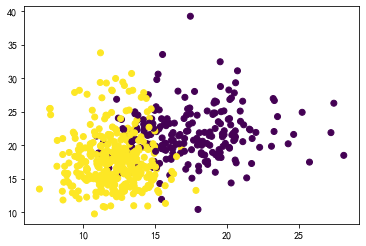

In [28]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [29]:
Kernel = ['linear','poly','rbf','sigmoid']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=420)

In [22]:
for kernel in Kernel:
    # if kernel == 'poly': continue
    t0 = time()
    svc = SVC(kernel=kernel
              ,gamma='auto'
              ,degree=1  #适用于poly，degree代表多项式次数，默认3
              ,cache_size=5000
             ).fit(X_train, Y_train)
    print('当Kernel为%s时的分数为：%f' % (kernel,svc.score(X_test, Y_test)))
    print('所需要的时间为：%s' % datetime.datetime.fromtimestamp(time()-t0).strftime('%M:%S:%f'))

当Kernel为linear时的分数为：0.976608
所需要的时间为：00:00:003064
当Kernel为poly时的分数为：0.964912
所需要的时间为：00:00:013084
当Kernel为rbf时的分数为：0.970760
所需要的时间为：00:00:006976
当Kernel为sigmoid时的分数为：0.953216
所需要的时间为：00:00:003236


In [18]:
data_df = pd.DataFrame(X)
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
2,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
3,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
5,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
6,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
7,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
8,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
9,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [3]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [20]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [5]:
gamma_range = np.logspace(-10,-1)

0.9766081871345029 0.012067926406393313


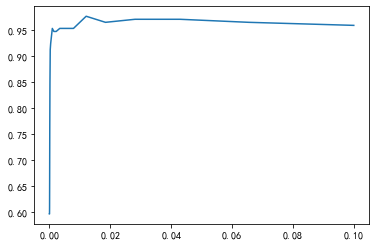

In [8]:
score = []
for i in gamma_range:
    svc = SVC(kernel='rbf',gamma=i,cache_size=5000).fit(X_train,Y_train)
    score.append(svc.score(X_test,Y_test))
print(max(score),gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

t0 = time()

gamma_range = np.logspace(-10,1,20)
coef0_range = np.linspace(0,5,10)

param_grid = dict(gamma = gamma_range,coef0 = coef0_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420)

grid = GridSearchCV(SVC(kernel='poly',degree=1,cache_size=5000)
                   ,param_grid=param_grid
                   ,cv=cv
                   )
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'coef0': 0.0, 'gamma': 0.18329807108324375}
0.9695906432748538


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [28]:
class_1 = 500
class_2 = 50
centers = [[0.0,0.0],[2.0,2.0]]
cluster_std = [1.5,0.5]
X, y = make_blobs(n_samples=[class_1,class_2]
                 ,centers=centers
                 ,cluster_std=cluster_std
                 ,random_state=0
                 ,shuffle=False
                 )

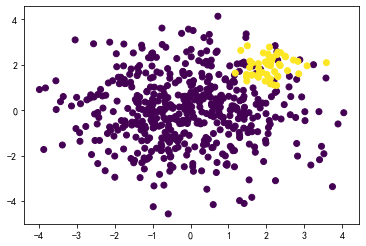

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [29]:
svc = SVC(kernel='linear',C=1).fit(X,y)
svc_cw = SVC(kernel='linear',C=1,class_weight = {1:10}).fit(X,y)

In [6]:
svc.score(X,y)

0.9418181818181818

In [7]:
svc_cw.score(X,y)

0.9127272727272727

In [9]:
(y[y == svc.predict(X)] == 1).sum() / (svc.predict(X) == 1).sum()

0.7142857142857143

In [10]:
(y[y == svc_cw.predict(X)] == 1).sum() / (svc_cw.predict(X) == 1).sum()

0.5102040816326531

In [11]:
(y[y == svc.predict(X)] == 1).sum() / (y == 1).sum()

0.6

In [12]:
(y[y == svc_cw.predict(X)] == 1).sum() / (y == 1).sum()

1.0

In [87]:
class_1 = 7
class_2 = 4
centers = [[0.0,0.0],[1.0,1.0]]
cluster_std = [0.5,1]
X, y = make_blobs(n_samples=[class_1,class_2]
                 ,centers=centers
                 ,cluster_std=cluster_std
                 ,random_state=0
                 ,shuffle=False
                 )

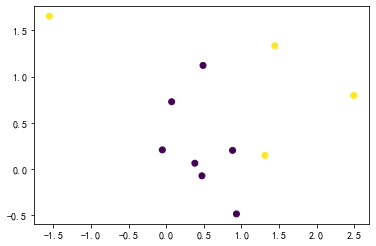

In [88]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression as LR

clf = LR().fit(X,y)

proba = clf.predict_proba(X)

import pandas as pd

proba = pd.DataFrame(proba)

proba.columns = ['0','1']

proba

for i in range(proba.shape[0]):
    if proba.loc[i,'1'] > 0.4:
        proba.loc[i,'pre'] = 1
    else:
        proba.loc[i,'pre'] = 0

proba['y_true'] = y

y.shape

proba = proba.sort_values(by='1',ascending=False)

proba.shape[0]

from sklearn.metrics import confusion_matrix as CM,precision_score as P,recall_score as R

CM(proba.loc[:,'y_true'],proba.loc[:,'pre'],labels=[1,0])

array([[ 33,  17],
       [ 15, 485]], dtype=int64)

In [32]:
cm = CM(proba.loc[:,'y_true'],proba.loc[:,'pre'],labels=[1,0])

In [105]:
#FPR
cm[1,0]/cm[1,:].sum()

0.14285714285714285

In [106]:
#Recall
R(proba.loc[:,'y_true'],proba.loc[:,'pre'],labels=[1,0])

0.5

In [9]:
clf_proba = SVC(kernel='linear',C=1.0,probability=True).fit(X,y)

In [10]:
clf_proba.predict_proba(X)

array([[0.68819263, 0.31180737],
       [0.26601595, 0.73398405],
       [0.96268954, 0.03731046],
       ...,
       [0.15796922, 0.84203078],
       [0.35600922, 0.64399078],
       [0.31881863, 0.68118137]])

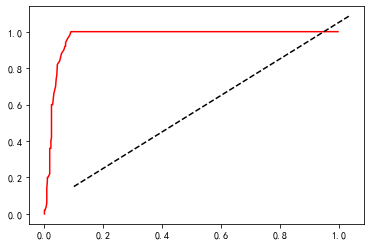

In [11]:
#ROC曲线
recall = []
FPR = []

pro = np.linspace(clf_proba.predict_proba(X)[:,1].min(),clf_proba.predict_proba(X)[:,1].max(),50,retstep=False)

for i in pro:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba.predict_proba(X)[j,1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(y,y_predict,labels=[1,0])
    recall.append(R(y,y_predict,labels=[1,0]))
    FPR.append(cm[1,0]/cm[1,:].sum())
    
recall.sort()
FPR.sort()

plt.plot(FPR,recall,c='red')
plt.plot(pro+0.1,pro+0.15,c='k',linestyle='--')
plt.show()

In [74]:
P(proba.loc[:,'y_true'],proba.loc[:,'pre'],labels=[1,0])

1.0

In [75]:
R(proba.loc[:,'y_true'],proba.loc[:,'pre'],labels=[1,0])

0.5

In [119]:
proba

,0,1,pre,y_true
527,0.051376,9.486238e-01,1.0,1
99,0.097653,9.023472e-01,1.0,0
54,0.126195,8.738047e-01,1.0,0
72,0.126680,8.733198e-01,1.0,0
547,0.133446,8.665537e-01,1.0,1
...,...,...,...,...
256,0.999999,1.330771e-06,0.0,0
346,0.999999,1.312355e-06,0.0,0
342,0.999999,1.116952e-06,0.0,0
191,0.999999,1.017827e-06,0.0,0


In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as AUC

In [21]:
clf_proba.decision_function(X).shape

(550,)

In [19]:
FPR, recall, thresholds = roc_curve(y,clf_proba.decision_function(X),pos_label=1)

In [39]:
FPR.shape

(45,)

In [35]:
area = AUC(y,clf_proba.decision_function(X))

In [48]:
m =  (recall - FPR).tolist().index((recall - FPR).max())

In [49]:
recall[m]

1.0

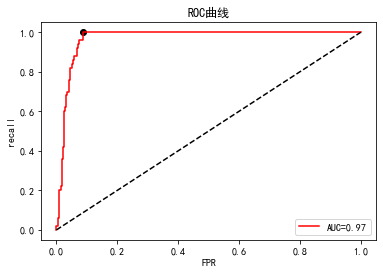

In [51]:
plt.figure()
plt.plot(FPR,recall,c='r',label='AUC=%.2f'%area)
plt.plot([0,1],[0,1],c='k',linestyle='--')
plt.scatter(FPR[m],recall[m],c='k')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR')
plt.ylabel('recall')
plt.title('ROC曲线')
plt.legend(loc=4)
plt.show()